In [1]:
import random
from libs.node import Node
from libs.node import Station
from libs.node import StationDcf
from libs.node import StationRl
from libs.channel import Channel
from tqdm import tqdm
from config import Config
import matplotlib.pyplot as plt

In [2]:
cfg = Config()
global_time = 0
channel = Channel(global_time, [])

station_num = 5
data_rate = 6 #Mbps
#All the lengeth is a mutible of slot

#incule header
pkt_len = 1560
#us
slot_len = 10
sifs = 2
ack_len = 2 + sifs
difs = 4
timeout = ack_len

frame_len = pkt_len * 8 / slot_len / data_rate
stations_list = []
total_time = 0

#station = StationDcf(i+1, frame_len, channel, global_time, i+1, timeout, ack_len, difs, sifs)
#stations_list.append(station)

for i in range(station_num):
    if cfg.stationType == "Dcf":
        station = StationDcf(i, frame_len, channel, global_time, i, timeout, ack_len, difs, sifs)
    elif cfg.stationType == "RL":
        station = StationRl(i, frame_len, channel, global_time, i, timeout, ack_len, (i+1))
    stations_list.append(station)

In [3]:
stations_list

In [4]:
if cfg.stationType == "Dcf":
    startEpoch = 0
elif cfg.stationType == "RL":
    startEpoch = stations_list[0].epoch

print("==> startEpoch: ", startEpoch)
for i in tqdm(range(startEpoch, startEpoch+cfg.NUM_EPOCHS)):
    for station in stations_list:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

    if cfg.shuffleStationList:
        random.shuffle(stations_list)

for station in stations_list:
    total_time += station.total_pkt_time

    if cfg.stationType == "RL":
        station.saveModel()
print("==> total_time:", total_time)
total_time_channel = 0
for i in range(len(channel.start) ):
    if(i > 0):
        if ((channel.start[i] - channel.start[i-1]) < frame_len):
            continue
    total_time_channel += frame_len
print("==> total_time_channel:", total_time_channel)
print("==> channel time:", channel.time)
throughput = total_time/channel.time * data_rate * 1500 / 1560
print("==> throughput:", throughput)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

==> startEpoch:  0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:02<00:00, 23.65it/s]

==> saving model...
==> saving model...
==> saving model...
==> saving model...
==> saving model...
==> total_time: 2288.0
==> total_time_channel: 9984.0
==> channel time: 10073.0
==> throughput: 1.3104338330189615


[0, 208]
[0, 0]
[0, 208]
[4, 4]
[0, 208]
[2, 2]
[0, 208]
[1, 1]
[209, 417]
[3, 3]
[209, 417]
[0, 0]
[209, 417]
[4, 4]
[418, 626]
[0, 0]
[631, 839]
[1, 1]
[631, 839]
[0, 0]
[840, 1048]
[2, 2]
[840, 1048]
[4, 4]
[1049, 1257]
[0, 0]
[1262, 1470]
[1, 1]
[1262, 1470]
[0, 0]
[1262, 1470]
[4, 4]
[1471, 1679]
[0, 0]
[1471, 1679]
[4, 4]
[1471, 1679]
[1, 1]
[1471, 1679]
[2, 2]
[1680, 1888]
[3, 3]
[1680, 1888]
[2, 2]
[1889, 2097]
[4, 4]
[1889, 2097]
[0, 0]
[1889, 2097]
[1, 1]
[1889, 2097]
[2, 2]
[1889, 2097]
[3, 3]
[2098, 2306]
[0, 0]
[2098, 2306]
[4, 4]
[2098, 2306]
[1, 1]
[2098, 2306]
[2, 2]
[2307, 2515]
[1, 1]
[2307, 2515]
[4, 4]
[2307, 2515]
[0, 0]
[2516, 2724]
[2, 2]
[2516, 2724]
[0, 0]
[2516, 2724]
[3, 3]
[2725, 2933]
[1, 1]
[2725, 2933]
[3, 3]
[2934, 3142]
[0, 0]
[2934, 3142]
[3, 3]
[2934, 3142]
[2, 2]
[3143, 3351]
[1, 1]
[3143, 3351]
[0, 0]
[3143, 3351]
[4, 4]
[3352, 3560]
[3, 3]
[3565, 3773]
[1, 1]
[3565, 3773]
[0, 0]
[3565, 3773]
[4, 4]
[3565, 3773]
[3, 3]
[3774, 3982]
[3, 3]
[3774, 398

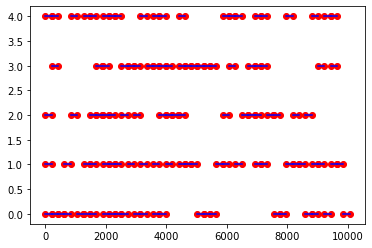

In [5]:
for i in range(len(channel.start)):
    x=[channel.start[i], channel.end[i]]
    print(x)
    y= [channel.operator[i], channel.operator[i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')

[29753, 29961]
[1, 1]
[29638, 29846]
[0, 0]
[29465, 29673]
[1, 1]
[29245, 29453]
[1, 1]
[28993, 29201]
[0, 0]
[28492, 28700]
[1, 1]
[28443, 28651]
[0, 0]
[28270, 28478]
[1, 1]
[27957, 28165]
[1, 1]
[27812, 28020]
[0, 0]


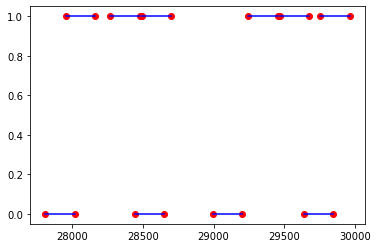

In [6]:
k = len(channel.start) - 1
for i in range(10):
    x=[channel.start[k - i], channel.end[k - i]]
    print(x)
    y= [channel.operator[k - i], channel.operator[k - i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')

In [6]:
stations_list[0].history


[['IDLE', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['IDLE', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['IOUT', tensor(0, device='cuda:0'), 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['IOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', tensor(0, device='cuda:0'), 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOU

In [5]:
channel.time

30001.0

In [6]:
import numpy as np

In [16]:
result = np.zeros(20, int)

In [19]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [18]:
result = np.concatenate([result[1:],[1]])

In [6]:
station.collision_times

0